In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def likelihood(z_l, z_r, x_l, x_r, W, sigma_y, sigma_n):
    N = len(x_l)
    I = np.eye(N)
    cov_0 = np.hstack((z_l**2*sigma_y**2*W@W.T + sigma_n**2*I, z_l*z_r*sigma_y**2*W@W.T))
    cov_1 = np.hstack((z_l*z_r*sigma_y**2*W@W.T, z_r**2*sigma_y**2*W@W.T + sigma_n**2*I))
    cov = np.vstack((cov_0, cov_1)) + np.eye(2*N)*10**(-12)
    rv = stats.multivariate_normal(mean=None, cov = cov)
    return rv.pdf(np.hstack((x_l,x_r)))

In [6]:
def relu(x):
    return (np.abs(x)+x)/2

In [7]:
def prior(z_l, z_r, alpha, beta):
    return z_l**(alpha-1)*np.exp(-beta*z_l)*z_r**(alpha-1)*np.exp(-beta*z_r)*relu(z_l*z_r)

In [71]:
#full GSM, continuous zl zr
def post_unormal(z_l,z_r,x_l, x_r, W, sigma_y, sigma_n, alpha, beta):
    return likelihood(z_l, z_r, x_l, x_r, W, sigma_y, sigma_n)*prior(z_l, z_r, alpha, beta)

In [76]:
#sample by MH
def mh(z_l,z_r,x_l, x_r, W, sigma_y, sigma_n, alpha, beta):
    z_ln = z_l + 0.3*np.random.randn()
    z_rn = z_r + 0.3*np.random.randn()
    not_valid = z_ln<0 or z_rn<0
    if not_valid:
        return z_l, z_r
    p_ori = post_unormal(z_l,z_r,x_l, x_r, W, sigma_y, sigma_n, alpha, beta)
    p_pro = post_unormal(z_ln,z_rn,x_l, x_r, W, sigma_y, sigma_n, alpha, beta)
    acc = p_pro/p_ori
    if np.random.rand()<acc:
        return z_ln, z_rn
    else:
        return z_l, z_r

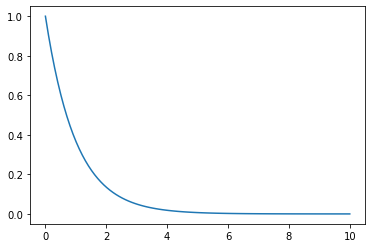

In [95]:
xt = np.linspace(0,10,100)
alpha = 1
beta = 1
plt.plot(xt,xt**(alpha-1)*np.exp(-beta*xt))

In [117]:
#2D histogram
x_l = np.array([0,3])
x_r = np.array([3,-0.01])
W = np.array([[0.5,0.75**0.5],[-0.5,0.75**0.5]])
sigma_y = 2
sigma_n = 0.1
alpha, beta = 1.5,1
n = 300000
z_list = np.zeros((n,2))
z_l = np.abs(np.random.randn())
z_r = np.abs(np.random.randn())
for i in range(n):
    z_l, z_r = mh(z_l, z_r,x_l, x_r, W, sigma_y, sigma_n, alpha, beta)
    z_list[i,0] = z_l
    z_list[i,1] = z_r

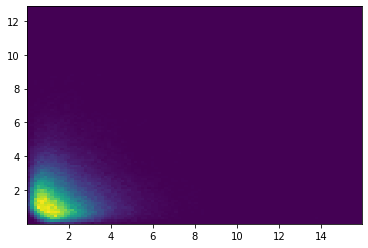

In [118]:
plt.hist2d(z_list[:,0], z_list[:,1], bins=100)
plt.show()